In [3]:

install.packages("tm")
install.packages("SnowballC")
install.packages("wordcloud")
install.packages("ggplot2")
install.packages("RColorBrewer")
install.packages("tidyverse")
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




In [4]:

# Load libraries
library(tm)
library(SnowballC)
library(wordcloud)
library(ggplot2)
library(RColorBrewer)
library(tidyverse)
library(ggcorrplot)



Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# Load the datasets
cereal_data <- read.csv("cereals.csv")  # Assuming your cereal dataset is saved as cereal.csv
passenger_data <- read.csv("passengers.csv")  # Assuming Titanic dataset as passengers.csv


In [6]:
# Convert 'Name' column to text corpus for text mining
name_data <- Corpus(VectorSource(passenger_data$Name))

# Convert to lowercase
name_data <- tm_map(name_data, content_transformer(tolower))

# Remove punctuation, numbers, and unwanted characters
name_data <- tm_map(name_data, removePunctuation)
name_data <- tm_map(name_data, removeNumbers)

# Remove stop words (common words like 'Mr', 'Mrs', 'Miss', etc.)
name_data <- tm_map(name_data, removeWords, stopwords("english"))

# Strip extra whitespace
name_data <- tm_map(name_data, stripWhitespace)

# Apply stemming (optional)
name_data <- tm_map(name_data, stemDocument)

# Convert back to text
cleaned_names <- sapply(name_data, as.character)


Warning message in tm_map.SimpleCorpus(name_data, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(name_data, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(name_data, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(name_data, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(name_data, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(name_data, stemDocument):
“transformation drops documents”


In [7]:
# Extract titles from the Name column
titles <- sub(".*, (.*)\\..*", "\\1", passenger_data$Name)

# View the unique titles extracted
table(titles)


titles
                    Capt                      Col                      Don 
                       1                        2                        1 
                      Dr                 Jonkheer                     Lady 
                       7                        1                        1 
                   Major                   Master                     Miss 
                       2                       40                      182 
                    Mlle                      Mme                       Mr 
                       2                        1                      517 
                     Mrs Mrs. Martin (Elizabeth L                       Ms 
                     124                        1                        1 
                     Rev                      Sir             the Countess 
                       6                        1                        1 

In [8]:
# Add titles as a new column in the data
passenger_data$title <- titles

# Analyze survival based on titles
title_survival <- table(passenger_data$title, passenger_data$Survived)
title_survival

                          
                             0   1
  Capt                       1   0
  Col                        1   1
  Don                        1   0
  Dr                         4   3
  Jonkheer                   1   0
  Lady                       0   1
  Major                      1   1
  Master                    17  23
  Miss                      55 127
  Mlle                       0   2
  Mme                        0   1
  Mr                       436  81
  Mrs                       26  98
  Mrs. Martin (Elizabeth L   0   1
  Ms                         0   1
  Rev                        6   0
  Sir                        0   1
  the Countess               0   1

In [9]:
# Select relevant numerical columns
numeric_data <- passenger_data[, c("Age", "Fare", "Pclass")]


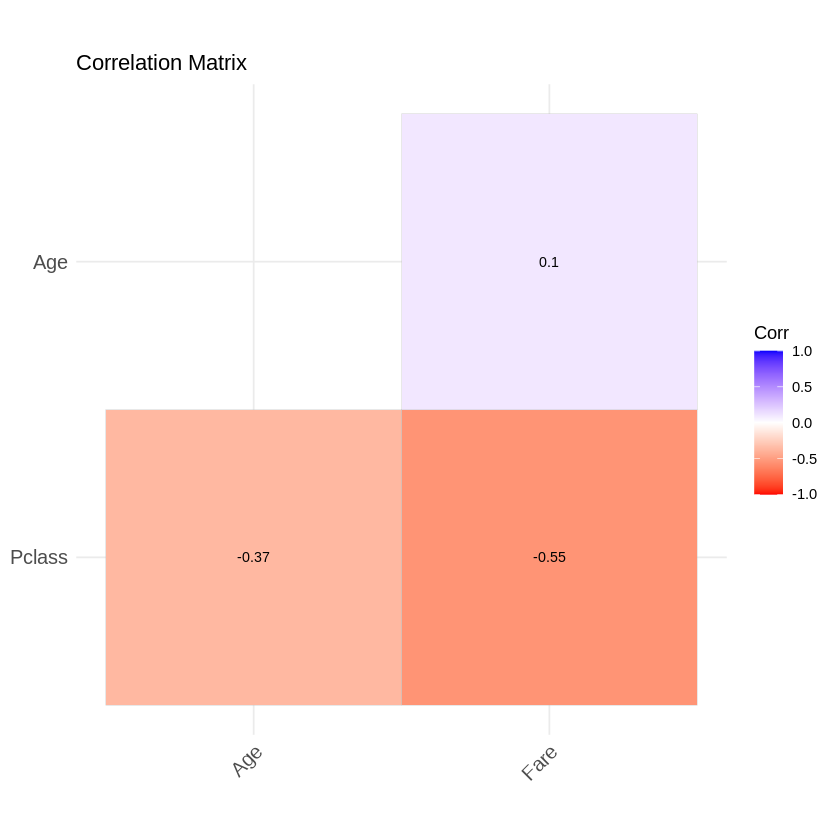

In [10]:
# Compute correlation
cor_matrix <- cor(numeric_data, use = "complete.obs")

# Visualize the correlation matrix using ggcorrplot
ggcorrplot(cor_matrix,
           hc.order = TRUE,   # Hierarchical clustering ordering of the matrix
           type = "lower",    # Show only the lower half of the correlation matrix
           lab = TRUE,        # Display correlation coefficients on the plot
           lab_size = 3,      # Font size for the correlation values
           title = "Correlation Matrix",
           colors = c("red", "white", "blue"))  # Color gradient for the plot

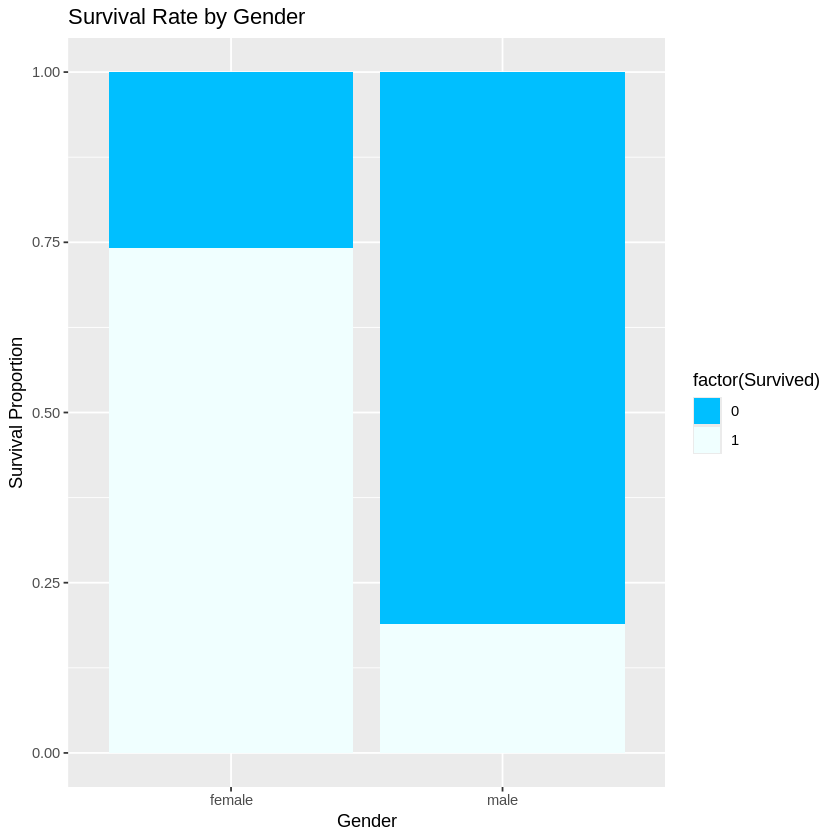

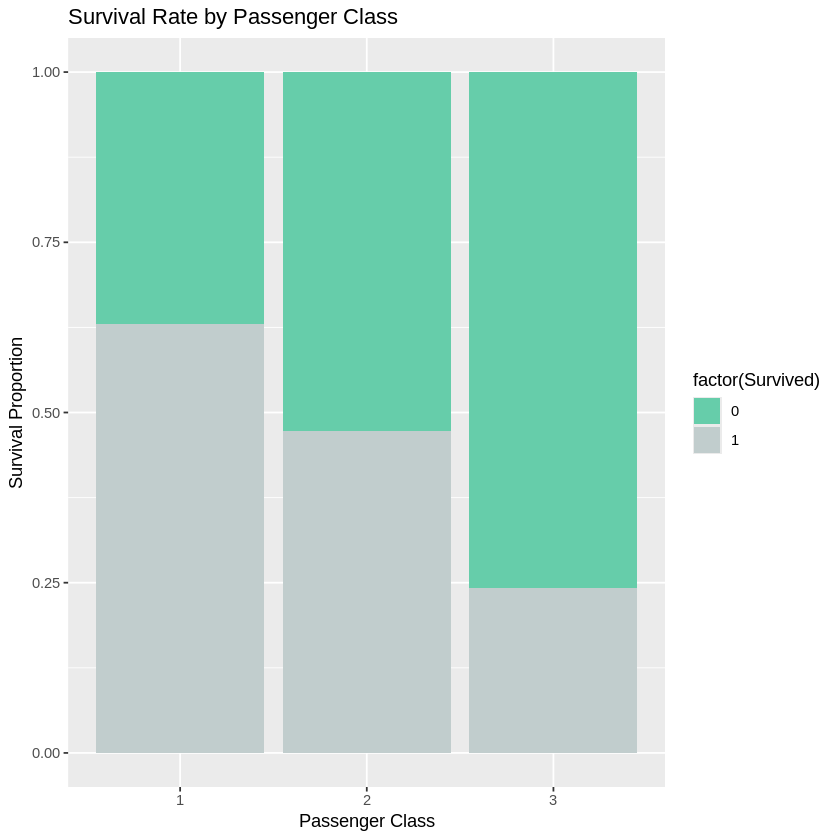

In [11]:
# Survival by gender
ggplot(passenger_data, aes(x = Sex, fill = factor(Survived))) +
  geom_bar(position = "fill") +
  labs(y = "Survival Proportion", x = "Gender", title = "Survival Rate by Gender") +
  scale_fill_manual(values = c("deepskyblue", "azure"))

# Survival by Pclass
ggplot(passenger_data, aes(x = factor(Pclass), fill = factor(Survived))) +
  geom_bar(position = "fill") +
  labs(y = "Survival Proportion", x = "Passenger Class", title = "Survival Rate by Passenger Class") +
  scale_fill_manual(values = c("aquamarine3", "azure3"))


In [12]:
# Summary statistics
summary(cereal_data)


    calories        protein           fat            sodium     
 Min.   : 50.0   Min.   :1.000   Min.   :0.000   Min.   :  0.0  
 1st Qu.:100.0   1st Qu.:2.000   1st Qu.:0.000   1st Qu.:132.5  
 Median :110.0   Median :3.000   Median :1.000   Median :180.0  
 Mean   :106.9   Mean   :2.547   Mean   :1.013   Mean   :160.2  
 3rd Qu.:110.0   3rd Qu.:3.000   3rd Qu.:1.500   3rd Qu.:215.0  
 Max.   :160.0   Max.   :6.000   Max.   :5.000   Max.   :320.0  
     fiber            rating     
 Min.   : 0.000   Min.   :18.04  
 1st Qu.: 0.500   1st Qu.:32.69  
 Median : 2.000   Median :40.40  
 Mean   : 2.183   Mean   :42.48  
 3rd Qu.: 3.000   3rd Qu.:50.80  
 Max.   :14.000   Max.   :93.70  

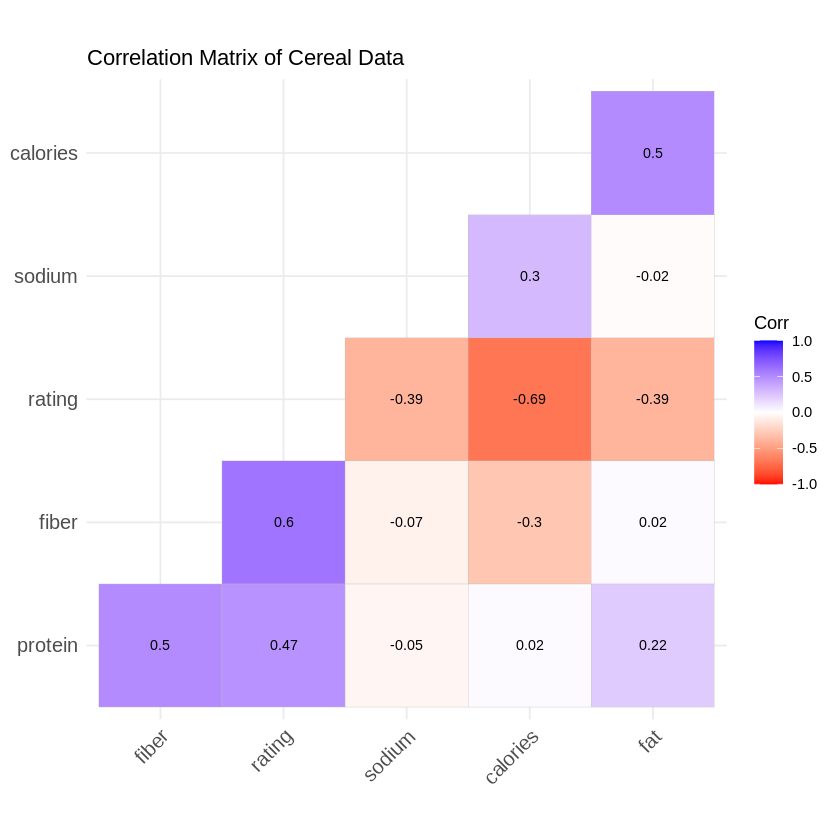

In [13]:
# Compute the correlation matrix for relevant numerical columns
correlation_matrix <- cor(cereal_data[, c("calories", "protein", "fat", "sodium", "fiber", "rating")])

# Visualize the correlation matrix using ggcorrplot
ggcorrplot(correlation_matrix,
           hc.order = TRUE,    # Hierarchical clustering to order the variables
           type = "lower",     # Show the lower half of the matrix
           lab = TRUE,         # Display correlation coefficients on the plot
           lab_size = 3,       # Font size of the correlation values
           title = "Correlation Matrix of Cereal Data",
           colors = c("red", "white", "blue"))  # Color gradient for positive and negative correlations


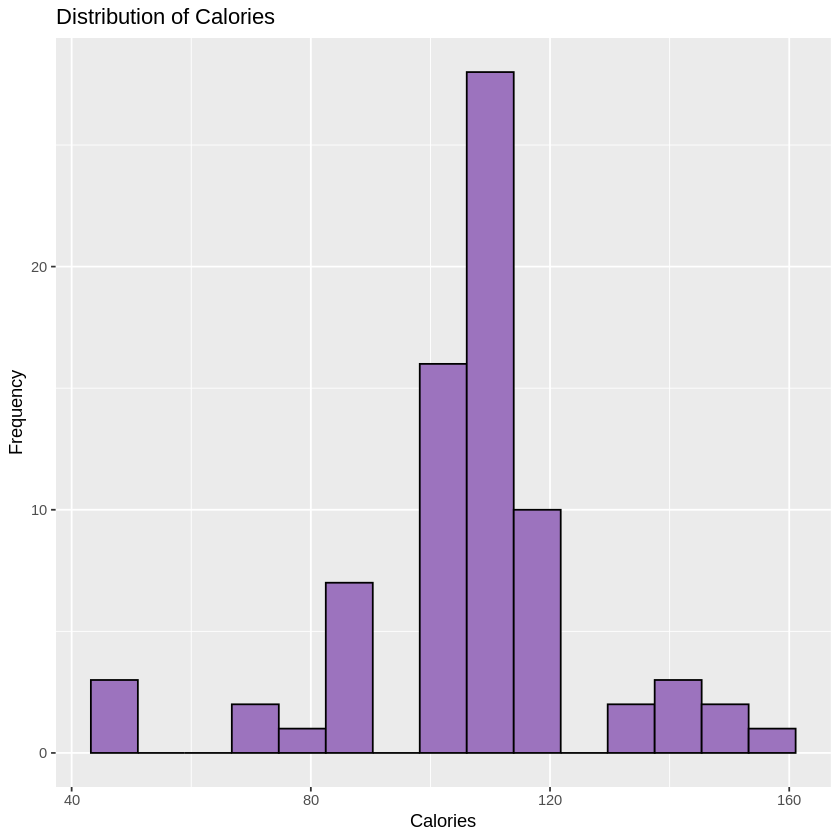

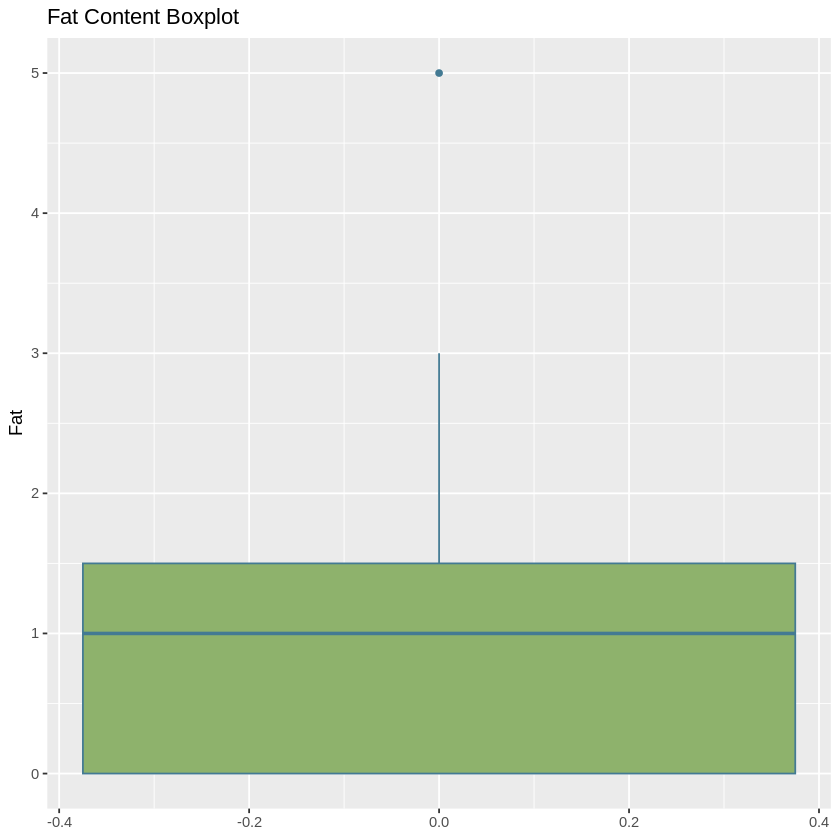

In [14]:
# Histogram of calories
ggplot(cereal_data, aes(x = calories)) +
  geom_histogram(bins = 15, fill = "#9c73be", color = "black") +
  labs(title = "Distribution of Calories", x = "Calories", y = "Frequency")

# Boxplot of fat content
ggplot(cereal_data, aes(y = fat)) +
  geom_boxplot(fill = "#8eb26c", color = "#437a93") +
  labs(title = "Fat Content Boxplot", y = "Fat")


In [15]:
# Filter top-rated cereals (Rating > 70)
top_rated_cereals <- subset(cereal_data, rating > 70)

# View the top-rated cereals
head(top_rated_cereals)


,calories,protein,fat,sodium,fiber,rating
,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4,50,4,0,140,14,93.70491
63,90,3,0,0,4,74.47295
64,90,3,0,0,3,72.80179


In [16]:
# Fit a logistic regression model to predict survival
logistic_model <- glm(Survived ~ Pclass + Age + SibSp + Parch + Fare + Sex,
                      data = passenger_data,
                      family = binomial)

# View the model summary
summary(logistic_model)

# Predict survival probabilities
predictions <- predict(logistic_model, passenger_data, type = "response")

# View predicted probabilities
head(predictions)



Call:
glm(formula = Survived ~ Pclass + Age + SibSp + Parch + Fare + 
    Sex, family = binomial, data = passenger_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.389003   0.603734   8.926  < 2e-16 ***
Pclass      -1.242249   0.163191  -7.612 2.69e-14 ***
Age         -0.043953   0.008179  -5.374 7.70e-08 ***
SibSp       -0.375755   0.127361  -2.950  0.00317 ** 
Parch       -0.061937   0.122925  -0.504  0.61436    
Fare         0.002160   0.002493   0.866  0.38627    
Sexmale     -2.634845   0.219609 -11.998  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 635.81  on 707  degrees of freedom
  (177 observations deleted due to missingness)
AIC: 649.81

Number of Fisher Scoring iterations: 5


1          2          3          4          5          6 
0.09115283 0.90506165 0.63102300 0.91272388 0.07631228         NA